In [1]:
import os
name = "Trained_CNN_Model"
load_model = True
save_model = False
train_again = False
working_dir = r"C:\Users\droko\Documents\קורסים\סדנה במדעי הנתונים\פרויקט"
saved_model_path = os.path.join(working_dir, f'{name}.h5')
saved_model_fit_results_path = os.path.join(working_dir, f'{name}_History.bin')

# Loading the data

In [2]:
data_dir = os.path.join(working_dir, "ChestXRays")

In [3]:
test_path = os.path.join(data_dir,'test')
train_path = os.path.join(data_dir, 'train')
val_path = os.path.join(data_dir, 'val')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_set = datagen.flow_from_directory(
    train_path, target_size=(224, 224), batch_size=16, class_mode='binary'
)

validation_set = datagen.flow_from_directory(
    val_path, target_size=(224, 224), batch_size=16, class_mode='binary'
)

test_set = datagen.flow_from_directory(
    test_path, target_size=(224, 224), batch_size=16, class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Building the model

## Create the model

In [5]:
from tensorflow import keras

if os.path.exists(saved_model_path) and load_model:
    model = keras.models.load_model(saved_model_path)
else:
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(224, 224, 3)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
import pickle

if os.path.exists(saved_model_fit_results_path) and not train_again:
    with open(saved_model_fit_results_path, "rb") as f:
        history = pickle.load(f)
else:
    results = model.fit(train_set, epochs=5, validation_data=validation_set)
    history = results.history
    with open(saved_model_fit_results_path, 'wb') as f:
        pickle.dump(history, f)

In [7]:
if save_model:
    model.save(saved_model_path)

# Measure the trained model

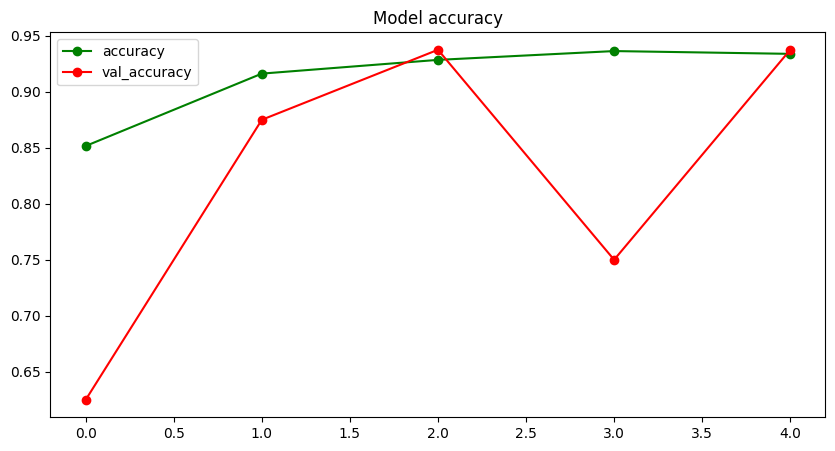

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Model accuracy")
plt.plot(history["accuracy"], "go-")
plt.plot(history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

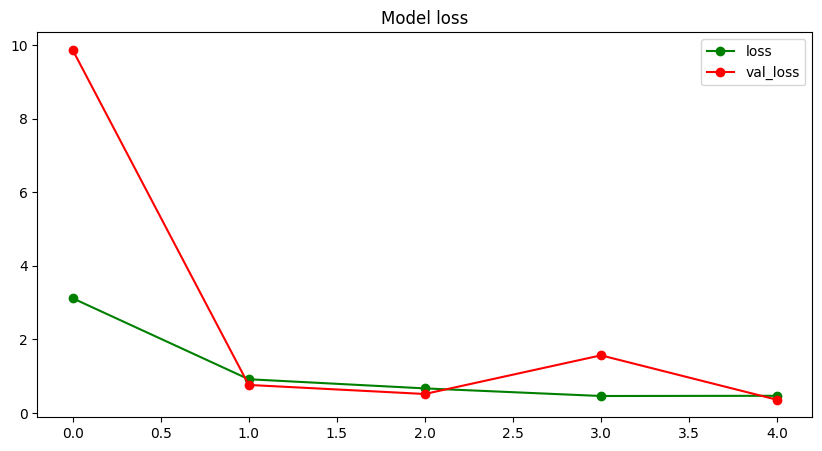

In [9]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history["loss"], "go-")
plt.plot(history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

# Evaluate the model on test set

In [10]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"The testing accuracy is: {test_accuracy*100}%")
print(f"The testing loss is: {test_loss*100}%")

39/39 [==============================] - 9s 218ms/step - loss: 1.7691 - accuracy: 0.7933
The testing accuracy is: 79.32692170143127%
The testing loss is: 176.91409587860107%


# Prediction of an image

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import random

def predict(model, image_path):
    test_image = image.load_img(image_path, target_size=(224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255

    result = model.predict(test_image)
    predicted_class = np.argmax(result[0])
    print(("PNEUMONIA" if predicted_class == 1 else "NORMAL") + f" [{str(result[0])}]")
    
normal_test_path = os.path.join(test_path, "NORMAL")
normal_image_path = os.path.join(normal_test_path, random.choice(os.listdir(normal_test_path)))
predict(model, normal_image_path)

pneumonia_test_path = os.path.join(test_path, "PNEUMONIA")
pneumonia_image_path = os.path.join(pneumonia_test_path, random.choice(os.listdir(pneumonia_test_path)))
predict(model, pneumonia_image_path)

1/1 [==============================] - 0s 129ms/step
NORMAL [[0.7915815  0.20841843]]
1/1 [==============================] - 0s 42ms/step
PNEUMONIA [[1.2999037e-09 1.0000000e+00]]
